In [1]:
from mplsoccer.pitch import Pitch
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import matplotlib.lines as mlines
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
background_color = '#2f3653'
line_color='#d2dde1'
marker_color = '#dcdf4c'
figsize = (16,9)
width, height = figsize
aspect = width/height

Load the crawley logo

In [3]:
IMAGE_URL = 'https://upload.wikimedia.org/wikipedia/en/8/8b/Crawley_Town_FC_logo.png'
logo = np.array(Image.open(urlopen(IMAGE_URL)))

Load the data. Note I have renamed some of the columns

In [4]:
df_pass = pd.read_csv('LubalaAssists.csv')
df_pass.rename({'x_pass_start':'pass_start_x','y_pass_start':'pass_start_y',
                'x_pass_end':'pass_end_x','y_pass_end':'pass_end_y'},axis=1,inplace=True)

In [5]:
df_pass.head()

,pass_start_x,pass_start_y,pass_end_x,pass_end_y,xg,assist
0,93.0,47.5,90.1,47.1,0.00,True
1,83.1,39.3,85.3,53.1,0.19,False
2,53.2,50.9,40.2,54.0,0.00,False
3,46.2,52.4,40.5,43.9,0.22,True
4,84.1,37.9,99.0,19.3,0.00,False


Subset the data

In [6]:
#boolean mask for assists or high xg. Use this to subset data
mask_line = (df_pass.assist==True)|(df_pass.xg>=0.1)
df_line = df_pass[mask_line].copy()
# boolean mask for assists. Use this to subset data
mask_assist = (mask_line) & (df_pass.assist==True)
df_assist = df_pass[mask_assist].copy()
# booelan mask for other passes (no assist/goal). Use this to subset data
mask_other = (mask_line) & (df_pass.assist==False)
df_other = df_pass[mask_other].copy()

Setup how big the axis should be

In [7]:
# note this is in reference to the figure where 1 is the whole figure (0-1)
logo_display_width = 0.1
pitch_display_width = 0.58
key_display_width = 0.2
legend_display_width = 0.05
empty_display_width = 0.2

Setup the pitch

In [8]:
pitch = Pitch(pitch_color=background_color,line_color=line_color,orientation='vertical',pitch_type='opta',
              view='half')

Calculate the length of the axis from the widths (using the aspect ratios)

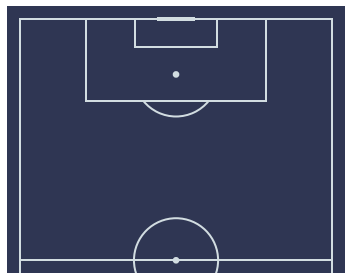

In [9]:
fig, ax = pitch.draw()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
pitch_aspect = (abs(xmax - xmin)/abs(ymax-ymin))*pitch.aspect

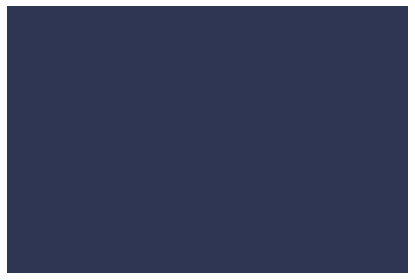

In [10]:
empty_pitch = Pitch(pitch_color=background_color,line_color=background_color,
                    orientation='horizontal',pitch_type='opta',view='full')
emp_fig, emp_ax = empty_pitch.draw()
xmin, xmax = emp_ax.get_xlim()
ymin, ymax = emp_ax.get_ylim()
pitch_aspect_emp = (abs(xmax - xmin)/abs(ymax-ymin))*empty_pitch.aspect

In [11]:
pitch_display_height = pitch_display_width/pitch_aspect*aspect
key_display_height = key_display_width/pitch_aspect*aspect
legend_display_height = legend_display_width/pitch_aspect*aspect
empty_display_height = empty_display_width/pitch_aspect_emp/aspect

In [12]:
# for this image the aspect is different so you have to calculate the logo height from its width
# so that you can get the height and width of the logo axis right
logo_height, logo_width, _ = logo.shape
logo_aspect = logo_width/logo_height
logo_display_height = logo_display_width/logo_aspect*aspect

Lets create the chart

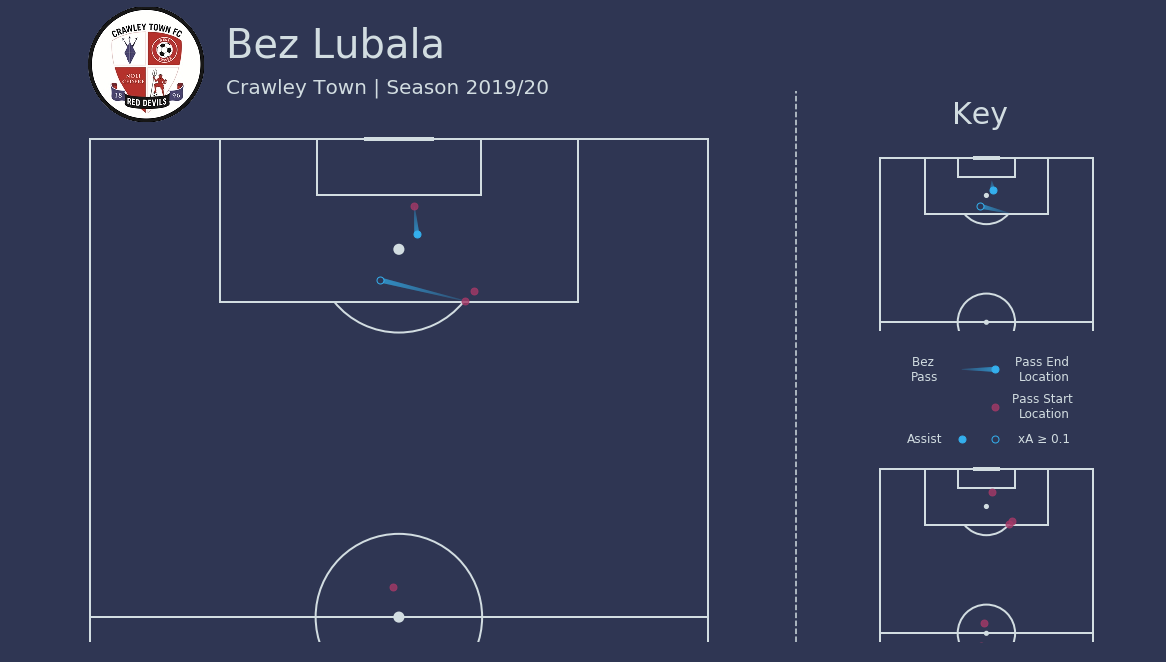

In [13]:
fig = plt.figure(figsize=figsize,facecolor=background_color);
# blank axis covering whole figure - so it all shows up
ax = fig.add_axes((0,0,1,1));
ax.axis('off');
# pitch
ax_pitch = fig.add_axes((0.05,0.02,pitch_display_width,pitch_display_height));
pitch.draw(ax=ax_pitch)
pitch.plot(df_assist.pass_end_x,df_assist.pass_end_y,
           markerfacecolor='#34afed',marker='o', color='None',markersize=7,zorder=3,
           linestyle='None',markeredgecolor='#34afed',ax=ax_pitch)  
pitch.plot(df_other.pass_end_x,df_other.pass_end_y,
           markerfacecolor=background_color,marker='o', color='None',markersize=7,zorder=3,
           linestyle='None',markeredgecolor='#34afed',ax=ax_pitch)
pitch.plot(df_pass.pass_start_x,df_pass.pass_start_y,
           marker='o', color='#a43967',markersize=7,alpha=0.8,linestyle='None',ax=ax_pitch)
pitch.lines(df_line.pass_start_x,df_line.pass_start_y,
            df_line.pass_end_x,df_line.pass_end_y,
            lw=5,color='#34afed',transparent=True,comet=True,ax=ax_pitch)
# key1
ax_key1 = fig.add_axes((0.75,0.5,key_display_width,key_display_height));
pitch.draw(ax=ax_key1)
pitch.plot(df_assist.pass_end_x,df_assist.pass_end_y,
           markerfacecolor='#34afed',marker='o', color='None',markersize=7,zorder=3,
           linestyle='None',markeredgecolor='#34afed',ax=ax_key1)
pitch.plot(df_other.pass_end_x,df_other.pass_end_y,
           markerfacecolor=background_color,marker='o', color='None',markersize=7,zorder=3,
           linestyle='None',markeredgecolor='#34afed',ax=ax_key1)
pitch.lines(df_line.pass_start_x,df_line.pass_start_y,
            df_line.pass_end_x,df_line.pass_end_y,
            color='#34afed',lw=5,transparent=True,comet=True,ax=ax_key1)
# key2
ax_key2 = fig.add_axes((0.75,0.02,key_display_width,key_display_height));
pitch.draw(ax=ax_key2)
pitch.plot(df_pass.pass_start_x,df_pass.pass_start_y,
           marker='o', color='#a43967',markersize=7,alpha=0.8,linestyle='None',ax=ax_key2)
# key legend - drawn on a pitch with lines set like the background
ax_key_legend = fig.add_axes((0.75,0.31,empty_display_width,empty_display_height));
empty_pitch.draw(ax=ax_key_legend)
# key legend - draw the pass line and end location
empty_pitch.lines([35],[75],[55],[75],color='#34afed',comet=True,transparent=True,ax=ax_key_legend)
empty_pitch.plot([55],[75],markerfacecolor='#34afed',markeredgecolor='#34afed',
                 marker='o', color='None',markersize=7,ax=ax_key_legend)
ax_key_legend.text(12.5,75,"Bez \nPass",horizontalalignment='center',fontsize=12,
                   verticalalignment='center',color=line_color)
ax_key_legend.text(85,75,"Pass End \nLocation",horizontalalignment='center',fontsize=12,
                   verticalalignment='center',color=line_color)
# key legend - draw the pass start location
empty_pitch.plot([55],[40],marker='o', color='#a43967',
                 markersize=7,alpha=0.8,linestyle='None',ax=ax_key_legend)
ax_key_legend.text(85,40,"Pass Start \nLocation",horizontalalignment='center',fontsize=12,
                   verticalalignment='center',color=line_color)
# key legend - draw the assist and xA ≥ 0.1
empty_pitch.plot([35],[10],markerfacecolor='#34afed',markeredgecolor='#34afed',
                 marker='o', color='None',markersize=7,ax=ax_key_legend)
empty_pitch.plot([55],[10],markerfacecolor=background_color,marker='o', color='None',markersize=7,
                 linestyle='None',markeredgecolor='#34afed',ax=ax_key_legend)
ax_key_legend.text(12.5,10,"Assist",horizontalalignment='center',fontsize=12,
                   verticalalignment='center',color=line_color)
ax_key_legend.text(85,10,"xA ≥ 0.1",horizontalalignment='center',fontsize=12,
                   verticalalignment='center',color=line_color)
# logo
ax_logo = fig.add_axes((0.07,1-logo_display_height,logo_display_width,logo_display_height));
ax_logo.axis('off');
ax_logo.imshow(logo);
# axis for dividing line
ax_line = fig.add_axes((0.66,0.02,0.05,0.85));
ax_line.axis('off')
ax_line.axvline(x=0.5, ymin=0, ymax=1,color=line_color,linestyle="--")
# add titles
fig.suptitle("Bez Lubala",x=0.19,y=0.97,verticalalignment='top',
             horizontalalignment='left',fontsize=40,color=line_color)
fig.text(0.19,0.89,"Crawley Town | Season 2019/20",verticalalignment='top',
             horizontalalignment='left',fontsize=20,color=line_color)
fig.text(0.82,0.82,"Key",fontsize=30,color=line_color);

In [14]:
fig.savefig('bez_Assist_xA.png',facecolor=background_color,dpi='figure')